In [162]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
from collections import OrderedDict
warnings.filterwarnings('ignore')
figsize = (10,6)

In [38]:
#find the result file that has the best average test value, ties are broken randomly
def find_best_test_run(file_dir):
    files = os.listdir(file_dir)
    max_test_files = []
    max_score = -float('inf')
    for f in files:
        if '.test' in f:
            df_test = pd.DataFrame(pd.read_csv(file_dir + f, delim_whitespace=True, index_col=0))
            reward_average = df_test['reward'].mean()
            if reward_average >= max_score:
                max_test_files.append(f)
    test_file = np.random.choice(max_test_files)
    file_prefix = test_file[:-5]
    files = {}
    files['config'] = file_prefix + '.config'
    files['train'] = file_prefix + '.train'
    files['test'] = file_prefix + '.test'
    return files

print find_best_test_run('../DQN/CartPole_Regular/Data/')

{'test': 'Run_6.test', 'train': 'Run_6.train', 'config': 'Run_6.config'}


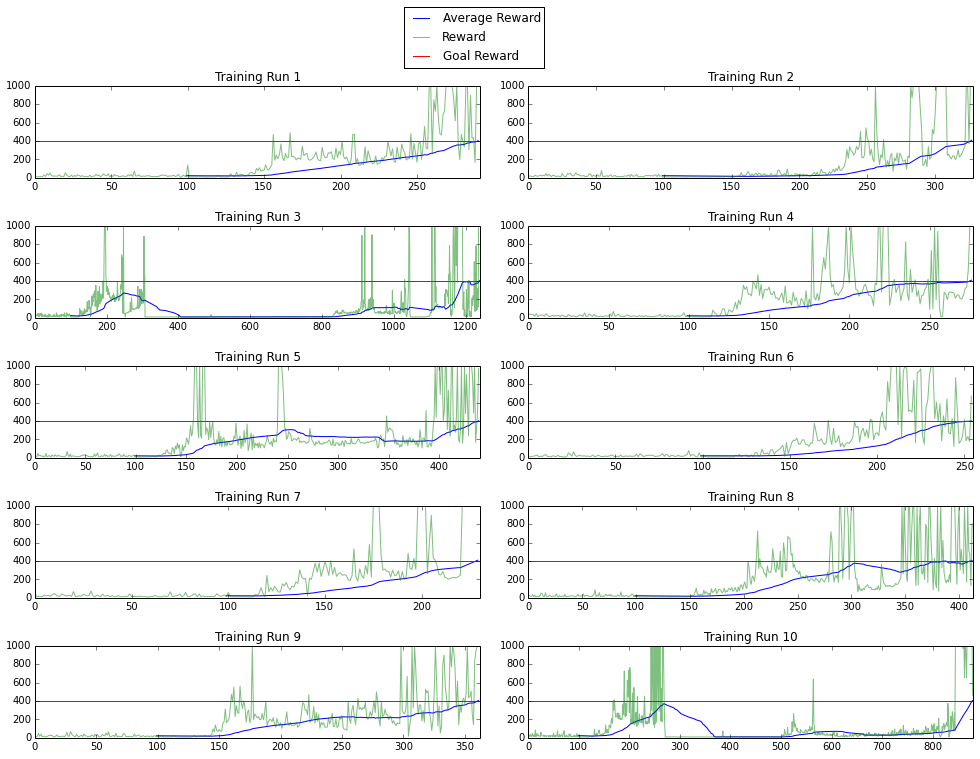

In [174]:
#plot all the training runs for a particular problem version
def plot_train_runs_report(file_dir, goal,  figsize=figsize, xlim=None, ylim=None):
    files = os.listdir(file_dir)
    df_trains = []
    for f in files:
        if '.train' in f:
            df_trains.append(pd.read_csv(file_dir + f, delim_whitespace=True, index_col=0))
    fig, ax = plt.subplots(nrows=5, ncols=2, figsize=figsize)
    axs = ax.ravel()
    #plt.setp(axs, yticks=[100,200,300,400])
    #plt.suptitle("All Training Episodes")
    for i, df in enumerate(df_trains):
        x_end = df.shape[0]
        ttl = 'Training Run ' + str(i+1)
        axs[i].plot(df['average_reward'], label='Average Reward')
        axs[i].plot(df['reward'], label='Reward', alpha=0.5)
        axs[i].plot([0, x_end], [goal, goal], label='Goal Reward')
        #axs[i].legend(bbox_to_anchor=(0.5,-0.1), loc='lower center')
        axs[i].set_xlim((0,x_end))
        axs[i].set_ylim(ylim)
        axs[i].title.set_text(ttl)
    #plt.xlim(xlim)
    #plt.legend(loc='best')
    plt.tight_layout(pad=2)
    plt.legend(bbox_to_anchor=(0.05,8.0))
    plt.show()
    
    
plot_train_runs_report('../DQN/CartPole_Regular/Data/', 400, (14,10))

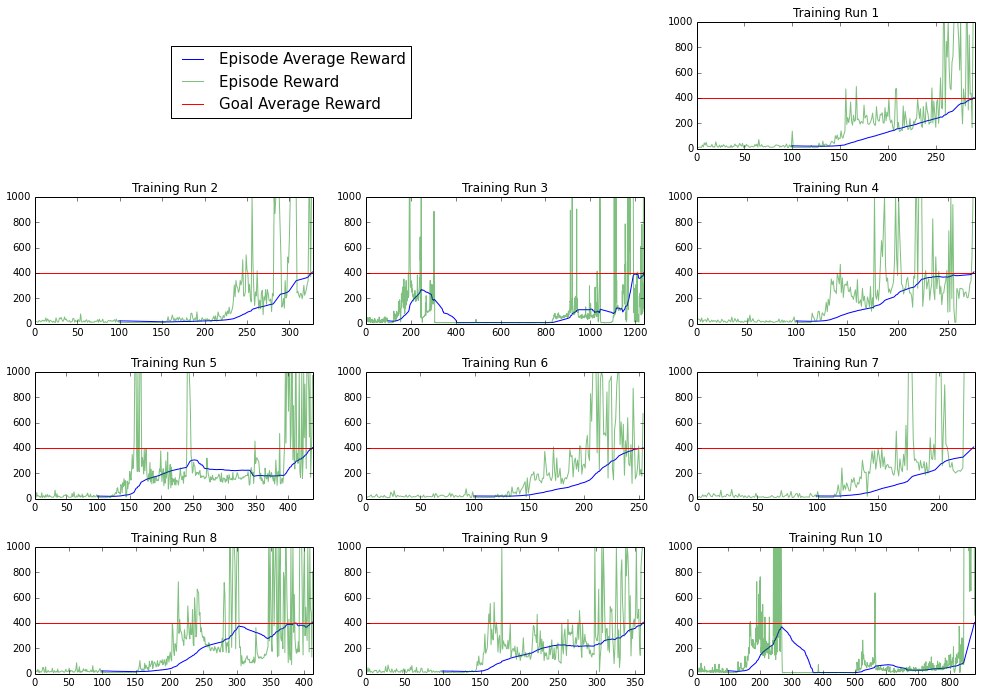

In [215]:
#plot all the training runs for a particular problem version
def plot_train_runs_slides(file_dir, goal,  figsize=figsize, xlim=None, ylim=None):
    files = os.listdir(file_dir)
    df_trains = []
    for f in files:
        if '.train' in f:
            df_trains.append(pd.read_csv(file_dir + f, delim_whitespace=True, index_col=0))
    fig, ax = plt.subplots(nrows=4, ncols=3, figsize=figsize)
    axs = ax.ravel()
    #plt.setp(axs, yticks=[100,200,300,400])
    #plt.suptitle("All Training Episodes")
    
    for i in range(0, 2):
        df = df_trains[0]
        x_end = df.shape[0]
        ttl = 'Dummy Plot'
        axs[i].plot(df['average_reward'], label='Episode Average Reward')
        axs[i].plot(df['reward'], label='Episode Reward', alpha=0.5)
        axs[i].plot([0, x_end], [goal, goal], label='Goal Average Reward')
        #axs[i].legend(bbox_to_anchor=(0.5,-0.1), loc='lower center')
        axs[i].set_xlim((0,x_end))
        axs[i].set_ylim(ylim)
        axs[i].title.set_text(ttl)
    
    for i, df in enumerate(df_trains):
        x_end = df.shape[0]
        ttl = 'Training Run ' + str(i+1)
        axs[i+2].plot(df['average_reward'], label='Episode Average Reward')
        axs[i+2].plot(df['reward'], label='Episode Reward', alpha=0.5)
        axs[i+2].plot([0, x_end], [goal, goal], label='Goal Average Reward')
        #axs[i+2].legend(bbox_to_anchor=(0.5,-0.1), loc='lower center')
        axs[i+2].set_xlim((0,x_end))
        axs[i+2].set_ylim(ylim)
        axs[i+2].title.set_text(ttl)
    
    
        
    
    #plt.xlim(xlim)
    #plt.legend(loc='best')
    plt.tight_layout(pad=2)
    axs[0].set_visible(False)
    axs[1].set_visible(False)
    plt.legend(bbox_to_anchor=(-1,5), fontsize=15)
    #plt.legend(loc='upper left')
    plt.show()
    
    
plot_train_runs_slides('../DQN/CartPole_Regular/Data/', 400, (14,10))

In [171]:
#plot all the training runs for a particular problem version
def show_test_run_table(file_dir):
    files = sorted(os.listdir(file_dir))
    file_names = []
    test_avgs = []
    for f in files:
        if '.test' in f:
            file_names.append(f[:-5])
            df = pd.read_csv(file_dir + f, delim_whitespace=True, index_col=0)
            test_avgs.append(df['reward'].mean())
    df_test = pd.DataFrame({'files': file_names, 'average': test_avgs })[['files', 'average']]
    print df_test
    
    
show_test_run_table('../DQN/CartPole_Regular/Data/')

   files  average
0  Run_0   551.87
1  Run_1  1000.00
2  Run_2  1000.00
3  Run_3  1000.00
4  Run_4  1000.00
5  Run_5  1000.00
6  Run_6  1000.00
7  Run_7     9.87
8  Run_8  1000.00
9  Run_9  1000.00
